In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV
from statsmodels.api import OLS, add_constant
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import r2_score, median_absolute_error
%matplotlib inline

/Users/williamtrenfield/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Loading up and examining the data

In [3]:
with open("data/data_description.txt", "r") as f:
    for line in f:
        print(line.strip())

MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl	Gravel
Pave	Pave

In [4]:
data = pd.read_csv("data/train.csv", index_col=0)
print(len(data))

1460


# Checking missing values

In [5]:
100 * (len(data) - data.count()) / len(data)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

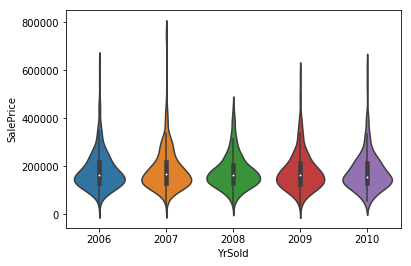

In [6]:
sns.violinplot(x="YrSold", y="SalePrice", data=data);

In [7]:
data.groupby("YrSold").mean()["SalePrice"]

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [8]:
data.groupby("Neighborhood").describe()["SalePrice"]

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,194870.882353,30393.229219,159895.0,174000.00,191000.0,213490.00,264561.0
Blueste,2.0,137500.000000,19091.883092,124000.0,130750.00,137500.0,144250.00,151000.0
BrDale,16.0,104493.750000,14330.176493,83000.0,91000.00,106000.0,118000.00,125000.0
BrkSide,58.0,124834.051724,40348.689270,39300.0,100500.00,124300.0,141175.00,223500.0
ClearCr,28.0,212565.428571,50231.538993,130000.0,183750.00,200250.0,242225.00,328000.0
CollgCr,150.0,197965.773333,51403.666438,110000.0,152958.75,197200.0,225725.00,424870.0
Crawfor,51.0,210624.725490,68866.395472,90350.0,159250.00,200624.0,239000.00,392500.0
Edwards,100.0,128219.700000,43208.616459,58500.0,101500.00,121750.0,145225.00,320000.0
Gilbert,79.0,192854.506329,35986.779085,141000.0,174000.00,181000.0,197200.00,377500.0


In [9]:
data.groupby(["Neighborhood", "MSZoning"]).describe()["SalePrice"]

count           mean            std       min  \
Neighborhood MSZoning                                                  
Blmngtn      RL         16.0  195879.062500   31095.022021  159895.0   
             RM          1.0  178740.000000            NaN  178740.0   
Blueste      RM          2.0  137500.000000   19091.883092  124000.0   
BrDale       RM         16.0  104493.750000   14330.176493   83000.0   
BrkSide      RL         28.0  133431.250000   51089.418083   39300.0   
             RM         30.0  116810.000000   25135.760348   60000.0   
ClearCr      RL         28.0  212565.428571   50231.538993  130000.0   
CollgCr      RL        140.0  201858.328571   50994.314070  110000.0   
             RM         10.0  143470.000000    6917.297160  131500.0   
Crawfor      RH          2.0  145000.000000       0.000000  145000.0   
             RL         46.0  207594.804348   65025.903762   90350.0   
             RM          3.0  300833.333333   81866.252713  235000.0   
Edwards      RH          2.0   91300.000000   17394.826817   79000.0   
             RL         90.0  128209.666667   45066.334316   58500.0   
             RM          8.0  137562.500000    7047.986035  130000.0   
Gilbert      RL         79.0  192854.506329   35986.779085  141000.0   
IDOTRR       C (all)     9.0   67931.111111   28195.381348   34900.0   
             RM         28.0  110471.428571   28165.487906   55000.0   
MeadowV      RM         17.0   98576.470588   23491.049610   75000.0   
Mitchel      RL         44.0  154691.727273   37698.951218   84500.0   
             RM          5.0  170160.000000   20705.144288  153500.0   
NAmes        RH          2.0  157000.000000   33941.125497  133000.0   
             RL        223.0  145747.053812   33128.753220   87500.0   
NPkVill      RL          9.0  142694.444444    9377.314529  127500.0   
NWAmes       RL         73.0  189050.068493   37172.218106   82500.0   
NoRidge      RL         41.0  335295.317073  121412.658640  190000.0   
NridgHt      RL         76.0  317708.394737   96198.305711  154000.0   
             RM          1.0  207000.000000            NaN  207000.0   
OldTown      C (all)     1.0  133900.000000            NaN  133900.0   
             RL         17.0  114701.764706   25791.593649   64500.0   
             RM         95.0  130585.568421   56130.509049   37900.0   
SWISU        RH          5.0  157886.800000   26823.461208  130000.0   
             RL         20.0  138767.500000   33404.956593   60000.0   
Sawyer       RL         72.0  137301.277778   22416.317482   62383.0   
             RM          2.0  118500.000000    9192.388155  112000.0   
SawyerW      RH          5.0  105780.000000   27901.469495   76000.0   
             RL         54.0  194035.037037   51556.175508   99500.0   
Somerst      FV         65.0  214014.061538   52369.662067  144152.0   
             RL         21.0  260559.619048   54009.759172  147000.0   
StoneBr      RL         25.0  310499.000000  112969.676640  170000.0   
Timber       RL         38.0  242247.447368   64845.651549  137500.0   
Veenker      RL         11.0  238772.727273   72369.317959  162500.0   

                             25%       50%        75%       max  
Neighborhood MSZoning                                            
Blmngtn      RL        173625.00  191500.0  213867.50  264561.0  
             RM        178740.00  178740.0  178740.00  178740.0  
Blueste      RM        130750.00  137500.0  144250.00  151000.0  
BrDale       RM         91000.00  106000.0  118000.00  125000.0  
BrkSide      RL         96375.00  128000.0  170750.00  223500.0  
             RM        102750.00  119500.0  132375.00  162900.0  
ClearCr      RL        183750.00  200250.0  242225.00  328000.0  
CollgCr      RL        173800.00  200320.5  228875.00  424870.0  
             RM        140250.00  143500.0  147875.00  155900.0  
Crawfor      RH        145000.00  145000.0  145000.00  145000.0  
             RL        160875.00  200362.0  237750.00  381000.

In [10]:
data.groupby("Street").describe()["SalePrice"]

,count,mean,std,min,25%,50%,75%,max
Street,,,,,,,,
Grvl,6.0,130190.500000,65446.253991,55993.0,88250.0,114250.0,169650.0,228950.0
Pave,1454.0,181130.538514,79446.597317,34900.0,130000.0,163000.0,214000.0,755000.0


In [11]:
data.groupby("Condition1").describe()["SalePrice"]

,count,mean,std,min,25%,50%,75%,max
Condition1,,,,,,,,
Artery,48.0,135091.666667,66226.660548,66500.0,105000.00,119550.0,143000.0,475000.0
Feedr,81.0,142475.481481,42157.290117,40000.0,121600.00,140000.0,167500.0,244600.0
Norm,1260.0,184495.492063,81256.980125,34900.0,131500.00,166500.0,219500.0,755000.0
PosA,8.0,225875.000000,52348.932313,180000.0,188750.00,212500.0,244000.0,335000.0
PosN,19.0,215184.210526,65256.536609,109500.0,167250.00,200000.0,252250.0,385000.0
RRAe,11.0,138400.000000,24030.813553,87000.0,127750.00,142500.0,156500.0,171000.0
RRAn,26.0,184396.615385,66177.922070,79500.0,152393.75,171495.0,190105.0,423000.0
RRNe,2.0,190750.000000,5303.300859,187000.0,188875.00,190750.0,192625.0,194500.0
RRNn,5.0,212400.000000,93823.238060,110000.0,128000.00,214000.0,290000.0,320000.0


In [12]:
data.groupby("MSSubClass").describe()["SalePrice"]

,count,mean,std,min,25%,50%,75%,max
MSSubClass,,,,,,,,
20,536.0,185224.811567,78782.189967,35311.0,132500.0,159250.0,220000.0,611657.0
30,69.0,95829.724638,24857.110083,34900.0,81000.0,99900.0,110500.0,163500.0
40,4.0,156125.000000,75747.799748,79500.0,119625.0,142500.0,179000.0,260000.0
45,12.0,108591.666667,20231.723889,76000.0,94125.0,107500.0,122250.0,139400.0
50,144.0,143302.972222,54851.983707,37900.0,114125.0,132000.0,159000.0,410000.0
60,299.0,239948.501672,86579.909966,129000.0,185000.0,215200.0,268750.0,755000.0
70,60.0,166772.416667,58206.545762,40000.0,128000.0,156000.0,189500.0,359100.0
75,16.0,192437.500000,100556.762577,101000.0,125625.0,163500.0,219625.0,475000.0
80,58.0,169736.551724,38197.808771,107000.0,147250.0,166500.0,179425.0,345000.0


In [13]:
data.groupby("BldgType").describe()["SalePrice"]

,count,mean,std,min,25%,50%,75%,max
BldgType,,,,,,,,
1Fam,1220.0,185763.807377,82648.502922,34900.0,131475.0,167900.0,222000.0,755000.0
2fmCon,31.0,128432.258065,35458.545158,55000.0,106875.0,127500.0,142500.0,228950.0
Duplex,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
Twnhs,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
TwnhsE,114.0,181959.342105,60626.108918,75500.0,143187.5,172200.0,207375.0,392500.0


In [14]:
data.groupby("BldgType").describe()["SalePrice"]

,count,mean,std,min,25%,50%,75%,max
BldgType,,,,,,,,
1Fam,1220.0,185763.807377,82648.502922,34900.0,131475.0,167900.0,222000.0,755000.0
2fmCon,31.0,128432.258065,35458.545158,55000.0,106875.0,127500.0,142500.0,228950.0
Duplex,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
Twnhs,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
TwnhsE,114.0,181959.342105,60626.108918,75500.0,143187.5,172200.0,207375.0,392500.0


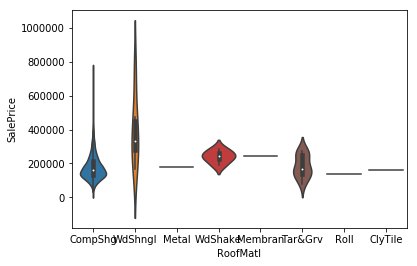

In [15]:
sns.violinplot(data=data, x="RoofMatl", y="SalePrice")

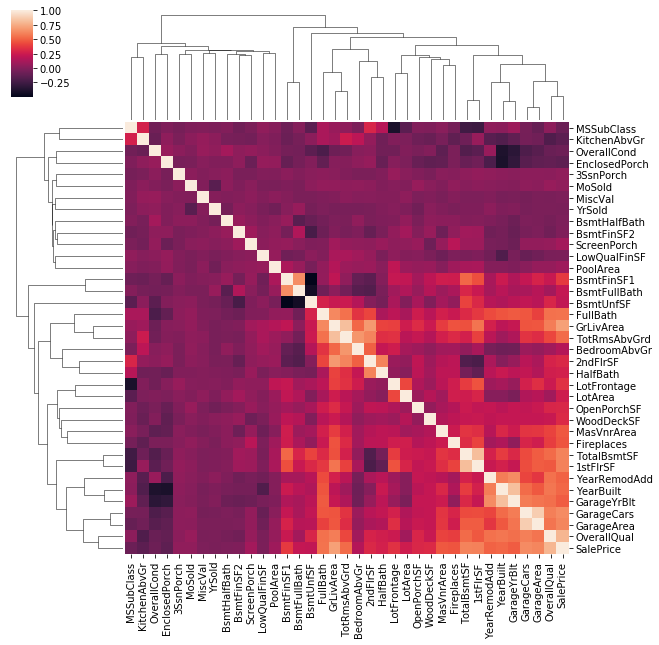

In [16]:
sns.clustermap(data.select_dtypes(exclude=object).corr())

# First round of modelling

In [17]:
data_transf = pd.get_dummies(data)

In [18]:
data_transf.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=289)

In [19]:
Y = data["SalePrice"]
X = data_transf[[c for c in data_transf.columns if c != "SalePrice"]]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X.dropna(axis=1), Y, random_state=1)

# Start with an out of the box random forest model

In [21]:
model = RandomForestRegressor(n_jobs=3, n_estimators=500, max_features="sqrt")

In [22]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
print("Naive random forest on training set R-squared", r2_score(model.predict(X_train), Y_train))
print("Naive random forest on test set R-squared:", r2_score(model.predict(X_test), Y_test))

Naive random forest on training set R-squared 0.9723159725688436
Naive random forest on test set R-squared: 0.7927573538583496


In [24]:
imps = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:25]
imps

OverallQual         0.087088
GrLivArea           0.071286
TotalBsmtSF         0.055377
1stFlrSF            0.047115
GarageCars          0.045361
GarageArea          0.043248
ExterQual_TA        0.036889
YearBuilt           0.031631
BsmtQual_Ex         0.026742
FullBath            0.026479
LotArea             0.024768
TotRmsAbvGrd        0.024542
BsmtFinSF1          0.023543
KitchenQual_Ex      0.021502
2ndFlrSF            0.021142
YearRemodAdd        0.019995
KitchenQual_TA      0.019227
Fireplaces          0.016115
ExterQual_Gd        0.013857
ExterQual_Ex        0.013559
OpenPorchSF         0.013522
BsmtQual_TA         0.010624
BsmtUnfSF           0.010212
BsmtFinType1_GLQ    0.009948
Foundation_PConc    0.009890
dtype: float64

# Neighborhoods fall into three distinct groups

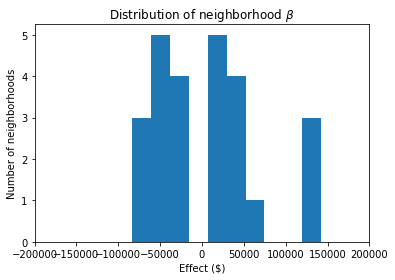

In [25]:
neighborhood_cols = [c for c in data_transf.columns if "Neighborhood" in c]
neighborhood_ols = OLS(Y_train, add_constant(X_train[neighborhood_cols])).fit()
neighborhood_ols.summary()
neighborhoods = [n for n in neighborhood_ols.params.index if n != "const"]
neighborhood_params = neighborhood_ols.params
neighborhood_p_values = neighborhood_ols.pvalues
fig, ax = plt.subplots()
ax.hist(neighborhood_ols.params[neighborhoods], bins=10, density=False)
ax.set_title(r"Distribution of neighborhood $\beta$")
ax.set_xlabel("Effect ($)")
ax.set_ylabel("Number of neighborhoods")
ax.set_xlim((-2*10**5, 2*10**5));

# Coarse-graining neighborhoods

In [26]:
def neighborhood_score(neighborhood, params=neighborhood_params, pvalues=neighborhood_p_values):
    try:
        if pvalues["Neighborhood_"+neighborhood] > 0.005:
            return 0 # no confidence, assign to normal
    except KeyError:
        return 1
    beta_hat = params["Neighborhood_"+neighborhood]
    if beta_hat < 0:
        return 0 #cheap neighborhood
    elif beta_hat > 0 and beta_hat < 10**5:
        return 1 #normal neighborhood
    else:
        return 2 #expensive neighborhood

# More feature engineering -- location scores


In [27]:
def good_location(cond):
    cond = str(cond)
    if "Pos" in cond:
        return 1
    elif "Feedr" in cond:
        return -1
    else:
        return 0

In [28]:
def asbestos(cond):
    if "Asb" in str(cond):
        return 1
    else:
        return 0

# New random forest model

In [29]:
def concrete_foundation(cnd):
    return int(cnd == "PConc")

In [30]:
def rank_quality(qual):
    rankings = {"Ex" : 2, "Gd" : 1, "TA" : 0, "Fa" : -1, "Po": -2}
    return rankings.get(qual, 0)

def deductions_score(deduction):
    return int("Typ" not in str(deduction))

def abnormal(sale_cond):
    return int(sale_cond == "Abnorml")

def no_central_air(ca):
    return int(ca == "N")

def remodeled_old(year_built, year_remodeled):
    if year_built < 1970 and year_remodeled > 2003:
        return 1
    else:
        return 0
def make_new_features(data):
    data["ex_qual_ranked"] = data.ExterQual.apply(rank_quality)
    data["age_at_sale"] = data.YrSold - data.YearBuilt
    data["years_since_remodel"] = data.YrSold - data.YearRemodAdd
    data["ex_cond_ranked"] = data.ExterCond.apply(rank_quality)
    data["heat_quality_ranked"] = data.HeatingQC.apply(rank_quality)
    data["kitchen_quality_ranked"] = data.KitchenQual.apply(rank_quality)
    data["has_damage"] = data.Functional.apply(deductions_score)
    data["abnormal_sale"] = data.SaleCondition.apply(abnormal)
    data["no_central_air"] = data.CentralAir.apply(no_central_air)
    data["concrete_foundation"] = data.Foundation.apply(concrete_foundation)
    data["Asbestos"] = np.sign(data.Exterior1st.apply(asbestos) + data.Exterior2nd.apply(asbestos))
    data["neighborhood_score"] = data.Neighborhood.apply(neighborhood_score)
    dummy_nhood = pd.get_dummies(data.neighborhood_score.apply(lambda x: ["nlow", "nmed", "nhigh"][x]))
    data["location_score"] = np.sign(data.Condition1.apply(good_location)+data.Condition2.apply(good_location))
    data["nocar_garage"] = data.GarageCars.apply(lambda x: int(x == 0))
    data["1car_garage"] = data.GarageCars.apply(lambda x: int(x==1))
    #data["2car_garage"] = data.GarageCars.apply(int(x==2))
    data["3pluscar_garage"] = data.GarageCars.apply(lambda x: int(x > 2))
    dummy_yr = pd.get_dummies(data.YrSold)
    dummy_yr.columns = ["yr"+str(c) for c in dummy_yr.columns]
    return pd.concat([data, dummy_nhood, dummy_yr], axis=1)

In [31]:
new_features = ["ex_qual_ranked", "ex_cond_ranked",
               "heat_quality_ranked", "kitchen_quality_ranked",
               "has_damage", "abnormal_sale", "no_central_air",
               "concrete_foundation", "Asbestos", "location_score", "neighborhood_score"]

quality_features = ["OverallQual", "OverallCond"]

data = make_new_features(data)

In [32]:
area_features = [c for c in data.columns if "area" in c.lower() or "sf" in c.lower()]

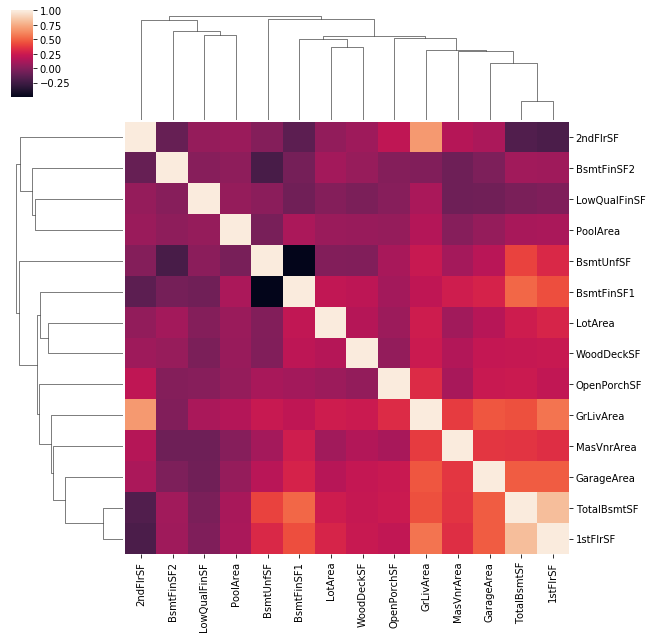

In [33]:
sns.clustermap(data[area_features].corr())

In [34]:
size_features = ["LotArea", "GrLivArea", "GarageCars", "Fireplaces", "2ndFlrSF", "TotalBsmtSF"]
time_features = ["age_at_sale", "years_since_remodel"]

# Trying a new random forest with engineered features

In [35]:
all_features = new_features+size_features+quality_features+time_features
X_new = data[all_features]
Y = data["SalePrice"]

In [36]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=3, max_features="log2", criterion="mse")
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, random_state=100, test_size=0.1)

rf.fit(X_train, Y_train)

Y_hat_train = rf.predict(X_train)
Y_hat_test = rf.predict(X_test)

In [37]:
R_square_IS_rf = r2_score(Y_train, Y_hat_train)
R_square_OOS_rf = r2_score(Y_test, Y_hat_test)

print(R_square_IS_rf)
print(R_square_OOS_rf)

0.9837180137775404
0.8702301797236206


In [38]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

OverallQual               0.184964
GrLivArea                 0.133734
TotalBsmtSF               0.097027
GarageCars                0.096484
ex_qual_ranked            0.092245
neighborhood_score        0.074338
age_at_sale               0.062108
kitchen_quality_ranked    0.052650
LotArea                   0.052311
2ndFlrSF                  0.047483
years_since_remodel       0.033975
Fireplaces                0.029164
concrete_foundation       0.013646
OverallCond               0.009270
heat_quality_ranked       0.007026
no_central_air            0.003238
ex_cond_ranked            0.002737
abnormal_sale             0.002701
location_score            0.002686
has_damage                0.001938
Asbestos                  0.000273
dtype: float64

# A linear model

In [39]:
out_of_model = ["neighborhood_score", "LotArea", "GrLivArea", "ex_cond_ranked", "years_since_remodel",
               "no_central_air", "concrete_foundation", "Asbestos", "heat_quality_ranked", "2ndFlrSF",
                "GarageCars", "TotalBsmtSF"]
lm_features = [c for c in all_features if not c in out_of_model] + ["nocar_garage", "1car_garage", "3pluscar_garage"]
X_lreg = add_constant(data[lm_features])
X_lreg["cpl_high"] = data["nhigh"] * data.GrLivArea
X_lreg["cpl_med"] = data["nmed"] * data.GrLivArea
X_lreg["cpl_low"] = data["nlow"] * data.GrLivArea
X_lreg["OverallCond"] -= 5
X_lreg["OverallQual"] -= 5
X_lreg["cpb_high"] = data["nhigh"] * data.TotalBsmtSF
X_lreg["cpb_med"] = data["nmed"] * data.TotalBsmtSF
X_lreg["cpb_low"] = data["nlow"] * data.TotalBsmtSF
lm = OLS(Y, X_lreg).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     458.9
Date:                Wed, 31 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:00:34   Log-Likelihood:                -17152.
No. Observations:                1460   AIC:                         3.434e+04
Df Residuals:                    1441   BIC:                         3.444e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    7.25e+04   3642.926     19.902      0.000    6.54e+04    7.96e+04
ex_qual_ranked          3602.5701   2429.184      1.483      0.138   -1162.545    8367.685
kitchen_quality_ranked  8171.9115   1910.118      4.278      0.000    4425.001    1.19e+04
has_damage             -7862.1696   3363.273     -2.338      0.020   -1.45e+04   -1264.735
abnormal_sale          -8948.1322   3246.568     -2.756      0.006   -1.53e+04   -2579.626
location_score          7205.9972   2964.907      2.430      0.015    1390.001     1.3e+04
Fireplaces               1.21e+04   1461.853      8.274      0.000    9227.655     1.5e+04
OverallQual             7925.5201   1109.306      7.145      0.000    5749.494    1.01e+04
OverallCond             7381.7859    839.812      8.790      0.000    5734.400    9029.172
age_at_sale             -316.8325     42.946     -7.377      0.000    -401.077    -232.588
nocar_garage           -9896.5775   3949.850     -2.506      0.012   -1.76e+04   -2148.506
1car_garage            -6526.7507   2296.214     -2.842      0.005    -1.1e+04   -2022.470
3pluscar_garage         2.895e+04   3102.705      9.331      0.000    2.29e+04     3.5e+04
cpl_high                  62.3674      4.028     15.483      0.000      54.466      70.269
cpl_med                   50.5063      3.307     15.275      0.000      44.020      56.992
cpl_low                   41.1974      2.546     16.182      0.000      36.203      46.191
cpb_high                  36.9562      5.309      6.961      0.000      26.542      47.370
cpb_med                   24.7559      4.283      5.780      0.000      16.354      33.158
cpb_low                   17.6593      2.739      6.448      0.000      12.287      23.032
==============================================================================
Omnibus:                      380.701   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24895.207
Skew:                          -0.165   Prob(JB):                         0.00
Kurtosis:                      23.227   Cond. No.                     7.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""